<a href="https://colab.research.google.com/github/ShathaAlshalawi/Gallstone_project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Step 2: Upload file
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset-uci.csv")
print(df.head())

Saving dataset-uci.csv to dataset-uci (1).csv
  Gallstone Status;Age;Gender;Comorbidity;Coronary Artery Disease (CAD);Hypothyroidism;Hyperlipidemia;Diabetes Mellitus (DM);Height;Weight;Body Mass Index (BMI);Total Body Water (TBW);Extracellular Water (ECW);Intracellular Water (ICW);Extracellular Fluid/Total Body Water (ECF/TBW);Total Body Fat Ratio (TBFR) (%);Lean Mass (LM) (%);Body Protein Content (Protein) (%);Visceral Fat Rating (VFR);Bone Mass (BM);Muscle Mass (MM);Obesity (%);Total Fat Content (TFC);Visceral Fat Area (VFA);Visceral Muscle Area (VMA) (Kg);Hepatic Fat Accumulation (HFA);Glucose;Total Cholesterol (TC);Low Density Lipoprotein (LDL);High Density Lipoprotein (HDL);Triglyceride;Aspartat Aminotransferaz (AST);Alanin Aminotransferaz (ALT);Alkaline Phosphatase (ALP);Creatinine;Glomerular Filtration Rate (GFR);C-Reactive Protein (CRP);Hemoglobin (HGB);Vitamin D
0  0;50;0;0;0;0;0;0;185;92.8;27.1;52.9;21.2;31.7;...                                                                

In [ ]:
# Step 3: Read the dataset
df = pd.read_csv("dataset-uci.csv")
print("Dataset shape:", df.shape)
df.head()

In [ ]:
# Step 4: Five Number Summary (for numeric columns)
summary = df.describe().T[["min", "25%", "50%", "75%", "max"]]
print("Five Number Summary:")
print(summary)

In [ ]:
# Step 5: Boxplots for numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.title("Boxplots for Numeric Features")
plt.show()

# Step 6: Detect outliers using IQR method
outliers = {}
for col in df.select_dtypes(include="number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].values

print("Outliers detected per column:")
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")


In [ ]:
# Step 7: Missing values count
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

# Step 8: Visualize missing values
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Step 9: Save the dataset
df.to_csv("Preprocessed_dataset.csv", index=False)


In [ ]:


# Step 3: Scatter Plot (Age vs BMI, colored by Gallstone Status)
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Body Mass Index (BMI)'],
            c=df['Gallstone Status'], cmap='coolwarm', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter Plot: Age vs BMI (colored by Gallstone Status)")
plt.colorbar(label="Gallstone Status")
plt.show()


In [ ]:
numeric_cols = ['Age', 'Body Mass Index (BMI)','Total Cholesterol (TC)', 'Glucose']

for col in numeric_cols:
    plt.figure(figsize=(7,5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram: {col} Distribution")
    plt.show()

In [ ]:
nominal_cols = ['Gender', 'Comorbidity', 'Gallstone Status']

for col in nominal_cols:
    counts = df[col].value_counts()
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color=['teal','orange','red'])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Bar Plot: {col} Distribution")
    plt.show()

In [ ]:
df['Gallstone Status'].value_counts()

In [ ]:
class_counts = df['Gallstone Status'].value_counts()
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['green','red'])
plt.xlabel("Gallstone Status (0=No, 1=Yes)")
plt.ylabel("Count")
plt.title("Class Label Distribution: Gallstone Status")
plt.show()

print("Class label counts:\n", class_counts)

In [ ]:
#Apply normalization to numeric attributes scale different numeric ranges into the same  scale Using MinMaxScaler

normalization_columns = ['Age', 'Body Mass Index (BMI)', 'Total Cholesterol (TC)', 'Glucose']

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[normalization_columns])

df_normalized = pd.DataFrame(
    normalized_data,
    columns=[col + '_normalized' for col in normalization_columns]
)

df_normalized.describe()

In [ ]:
# Applied variable transformation using log1p to reduce skewness and make distributions more symmetric ,automatically select attributes with skewness > 0.8

numeric_columns = ['Age', 'Body Mass Index (BMI)', 'Total Cholesterol (TC)', 'Glucose']
skewness_values = df[numeric_columns].skew()

high_skew_columns = skewness_values[abs(skewness_values) > 0.8].index.tolist()

df_processed = df.copy()
for column in high_skew_columns:
    df_processed[column + '_log'] = np.log1p(df[column])

df_processed[[col for col in df_processed.columns if '_log' in col]].head()

KeyError: 'Age'

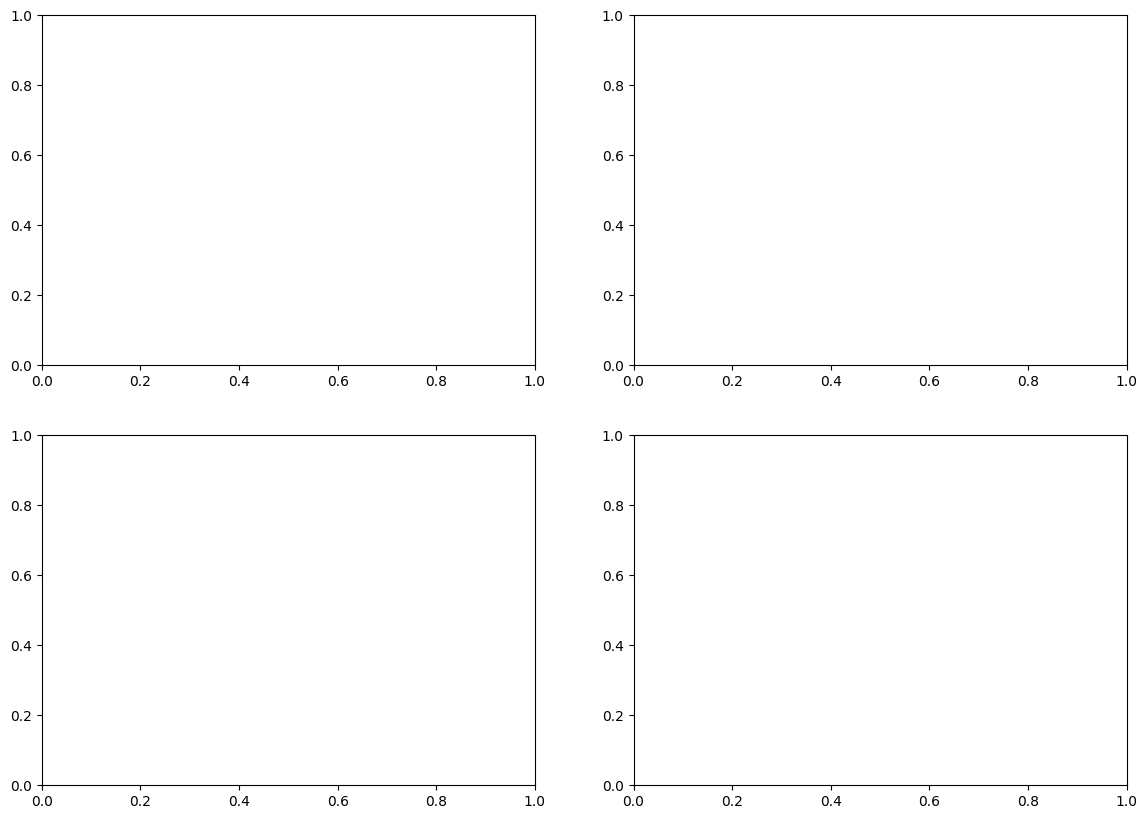

In [19]:
#Provide clear before/after visualization and justification to show  improvement after preprocessing


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Age normalization
axes[0, 0].hist(df['Age'], bins=15, alpha=0.7, color='skyblue', label='Before')
axes[0, 0].hist(df_normalized['Age_normalized'], bins=15, alpha=0.7, color='Red', label='After')
axes[0, 0].set_title('Normalization: Age Distribution')
axes[0, 0].legend()

# Plot 2: BMI normalization
axes[0, 1].hist(df['Body Mass Index (BMI)'], bins=15, alpha=0.7, color='Pink', label='Before')
axes[0, 1].hist(df_normalized['Body Mass Index (BMI)_normalized'], bins=15, alpha=0.7, color='Silver', label='After')
axes[0, 1].set_title('Normalization: BMI Distribution')
axes[0, 1].legend()

# Plot 3–4: Log transform comparison
if high_skew_columns:
    example_column = high_skew_columns[0]
    axes[1, 0].hist(df[example_column], bins=15, alpha=0.7, color='Purple', label='Before')
    axes[1, 0].set_title(f'Before Transformation: {example_column}')
    axes[1, 0].legend()

    axes[1, 1].hist(df_processed[example_column + '_log'], bins=15, alpha=0.7, color='Beige', label='After')
    axes[1, 1].set_title(f'After Log Transformation: {example_column}')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [21]:
#Feature Selection

report = {
    "original_shape": df.shape,
    "drop_missing_gt40": [],
    "drop_low_variance": [],
    "drop_identifier_like": [],
    "drop_high_corr": []
}

# (A) Drop columns with >40% missing values
missing_ratio = df.isna().mean()
to_drop_missing = list(missing_ratio[missing_ratio > 0.40].index)
df = df.drop(columns=to_drop_missing)
report["drop_missing_gt40"] = to_drop_missing

# (B) Drop columns with very low variance (only one unique value)
low_var_cols = []
for c in df.columns:
    if df[c].nunique(dropna=True) <= 1:
        low_var_cols.append(c)
df = df.drop(columns=low_var_cols)
report["drop_low_variance"] = low_var_cols

# (C) Drop identifier-like columns (name looks like id OR almost unique values)
id_like_cols = []
n = len(df)
for c in df.columns:
    name_is_id = any(p in str(c) for p in ["id","ID","Id","serial","Serial","index","Index"])
    nunique = df[c].nunique(dropna=True)
    uniq_ratio = (nunique / n) if n else 0
    if name_is_id or (uniq_ratio > 0.98 and nunique > 30):  # almost each row unique
        id_like_cols.append(c)

df = df.drop(columns=id_like_cols)
report["drop_identifier_like"] = id_like_cols

# (D) Drop highly correlated numeric columns (|corr| > 0.92)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
to_drop_corr = []
if len(num_cols) > 1:
    corr = df[num_cols].corr().abs()
    # simple upper-triangle pass
    checked = set()
    for col in corr.columns:
        for row in corr.index:
            if row != col and (row, col) not in checked and (col, row) not in checked:
                if corr.loc[row, col] > 0.92:
                    # drop the later column to avoid duplicates
                    if col not in to_drop_corr:
                        to_drop_corr.append(col)
                checked.add((row, col))

df = df.drop(columns=to_drop_corr, errors="ignore")
report["drop_high_corr"] = to_drop_corr

print("After feature selection:", df.shape)
report

After feature selection: (319, 0)


{'original_shape': (319, 1),
 'drop_missing_gt40': [],
 'drop_low_variance': [],
 'drop_identifier_like': ['Gallstone Status;Age;Gender;Comorbidity;Coronary Artery Disease (CAD);Hypothyroidism;Hyperlipidemia;Diabetes Mellitus (DM);Height;Weight;Body Mass Index (BMI);Total Body Water (TBW);Extracellular Water (ECW);Intracellular Water (ICW);Extracellular Fluid/Total Body Water (ECF/TBW);Total Body Fat Ratio (TBFR) (%);Lean Mass (LM) (%);Body Protein Content (Protein) (%);Visceral Fat Rating (VFR);Bone Mass (BM);Muscle Mass (MM);Obesity (%);Total Fat Content (TFC);Visceral Fat Area (VFA);Visceral Muscle Area (VMA) (Kg);Hepatic Fat Accumulation (HFA);Glucose;Total Cholesterol (TC);Low Density Lipoprotein (LDL);High Density Lipoprotein (HDL);Triglyceride;Aspartat Aminotransferaz (AST);Alanin Aminotransferaz (ALT);Alkaline Phosphatase (ALP);Creatinine;Glomerular Filtration Rate (GFR);C-Reactive Protein (CRP);Hemoglobin (HGB);Vitamin D'],
 'drop_high_corr': []}

In [22]:
#Noise removal (remove rows with extreme z-score > 3 in any numeric column)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
rows_removed = 0

if len(num_cols) > 0:
    means = df[num_cols].mean()
    stds  = df[num_cols].std(ddof=0).replace(0, np.nan)  # avoid divide by zero
    z = (df[num_cols] - means) / stds
    outlier_rows = (z.abs() > 3).any(axis=1)  # any numeric col exceeds 3
    rows_removed = int(outlier_rows.sum())
    df = df.loc[~outlier_rows].copy()

print("Rows removed as outliers (|z|>3):", rows_removed)
print("Final shape:", df.shape)

Rows removed as outliers (|z|>3): 0
Final shape: (319, 0)
